# MLOps with Pycaret and MLflow

#### Get data

In [1]:
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


# ML Flow Tracking Enablement

In [2]:
import mlflow


# Set MLflow tracking URI to a directory that exists
# mlflow.set_tracking_uri('file:///C:/Users/jalal/OneDrive/Desktop/jjj/3_Model versioning and registration with MLFlow/mlruns2')

mlflow.set_tracking_uri("http://localhost:5000")


#### Preprocessing

In [3]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'Price', 
          transform_target = True, 
          log_experiment = True, 
          #log_plots = True,
          experiment_name = 'diamond')

# Remember to run the local server using anaconda prompt with the command "mlflow server" 
# if you are seeing the model on mlflow dashboard

,Description,Value
0,Session id,6056
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


2023/12/09 19:35:51 INFO mlflow.tracking.fluent: Experiment with name 'diamond' does not exist. Creating a new experiment.


#### Model Training

In [4]:
# compare all models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,633.5960,1897329.1470,1331.1105,0.9820,0.0673,0.0492,0.1530
gbr,Gradient Boosting Regressor,759.5890,2507759.4046,1534.4431,0.9763,0.0771,0.0575,0.1860
et,Extra Trees Regressor,758.9386,2539547.2738,1542.4329,0.9759,0.0825,0.0602,0.5650
rf,Random Forest Regressor,746.4881,2581296.6118,1555.4158,0.9756,0.0800,0.0581,0.5840
dt,Decision Tree Regressor,927.9706,3786924.7193,1885.9659,0.9641,0.1022,0.0743,0.1010
ada,AdaBoost Regressor,1931.8534,15580250.3231,3892.0725,0.8499,0.1848,0.1477,0.1720
knn,K Neighbors Regressor,2971.3970,35654432.5709,5955.9935,0.6471,0.3577,0.2270,0.1070
omp,Orthogonal Matching Pursuit,3317.3716,78733086.4564,8699.3539,0.2054,0.2836,0.2235,0.0760
lasso,Lasso Regression,6598.1463,114091700.0157,10654.4673,-0.1272,0.7157,0.5685,0.0820
en,Elastic Net,6598.1463,114091700.0157,10654.4673,-0.1272,0.7157,0.5685,0.0710


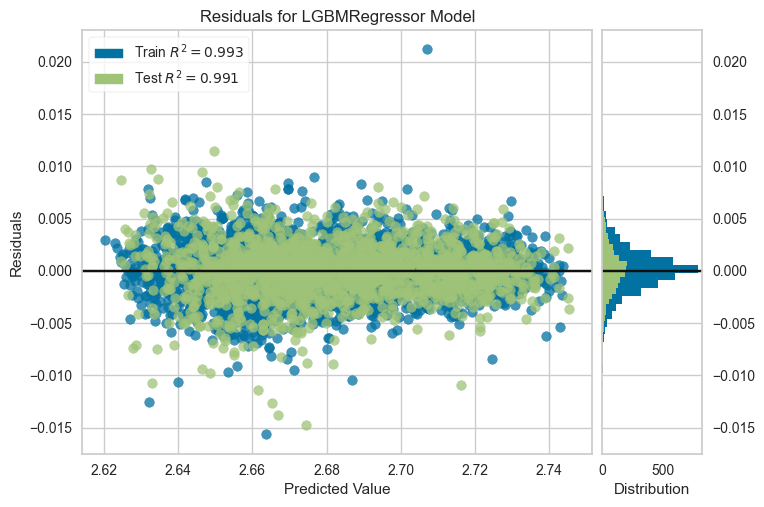

In [5]:
# check the residuals of trained model
plot_model(best, plot = 'residuals')

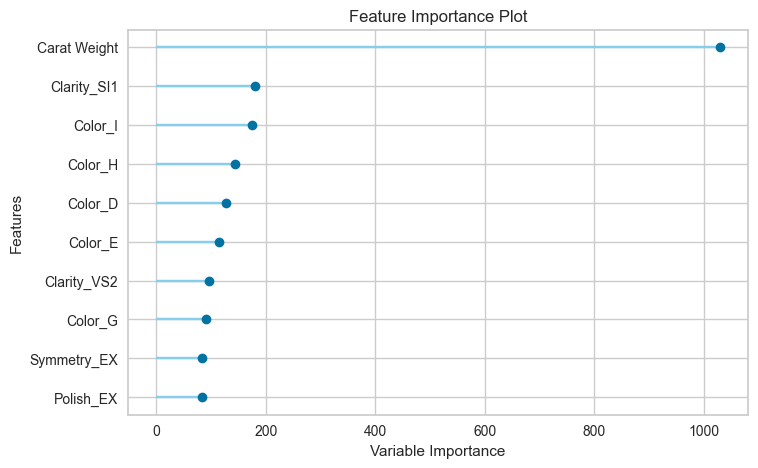

In [6]:
# check feature importance
plot_model(best, plot = 'feature')

In [7]:
# finalize the model
final_best = finalize_model(best)

# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'P...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',
                                        

### Model management with MLFlow

In [8]:
from IPython.display import IFrame

# MLflow UI URL
mlflow_ui_url = "http://localhost:5000"

# Display the MLflow UI in an iframe
# Set width to 100% to use the full width of the notebook
# Adjust height as needed, and make the frame scrollable if the content is longer
IFrame(mlflow_ui_url, width="100%", height=400, scrolling="yes")

### Consume the model

In [10]:
from pycaret.datasets import get_data

# Load the diamond dataset
data = get_data('diamond')

# Remove the 'Price' column
data_to_predict = data.drop('Price', axis=1)
print(data_to_predict.head())

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


   Carat Weight    Cut Color Clarity Polish Symmetry Report
0          1.10  Ideal     H     SI1     VG       EX    GIA
1          0.83  Ideal     H     VS1     ID       ID   AGSL
2          0.85  Ideal     H     SI1     EX       EX    GIA
3          0.91  Ideal     E     SI1     VG       VG    GIA
4          0.83  Ideal     G     SI1     EX       EX    GIA


In [14]:
import mlflow
logged_model = 'runs:/7d2bceb2fd1c41d19856f0ddbb3968a9/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(data_to_predict))

0        5421.280172
1        3569.891342
2        3341.587732
3        4531.185124
4        3256.250454
            ...     
5995     6268.852075
5996     5697.193454
5997     6211.871811
5998    11249.114436
5999    37274.421804
Name: Price, Length: 6000, dtype: float64

In [15]:
# print pipeline
print(loaded_model)

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: 7d2bceb2fd1c41d19856f0ddbb3968a9



# Running the model pipeline from local system

In [18]:
import mlflow


# Set MLflow tracking URI to a directory that exists
mlflow.set_tracking_uri('/3_Model versioning and registration with MLFlow/mlruns2')

# Again pre-processing on Local System

In [19]:
# initialize setup
from pycaret.regression import *
s = setup(data, target = 'Price', 
          transform_target = True, 
          log_experiment = True, 
          #log_plots = True,
          experiment_name = 'diamond')

,Description,Value
0,Session id,8058
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


2023/12/09 19:49:25 INFO mlflow.tracking.fluent: Experiment with name 'diamond' does not exist. Creating a new experiment.


# Training Model on Local Server

In [20]:
# compare all models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,636.1045,1860242.6977,1326.9330,0.9823,0.0668,0.0490,0.1710
rf,Random Forest Regressor,733.3464,2397723.1877,1510.1817,0.9773,0.0779,0.0575,0.5640
et,Extra Trees Regressor,758.2474,2517311.2611,1556.3236,0.9761,0.0807,0.0594,0.6520
gbr,Gradient Boosting Regressor,757.4825,2567830.6263,1533.4676,0.9755,0.0773,0.0576,0.2040
dt,Decision Tree Regressor,943.9266,3749927.1061,1905.7102,0.9643,0.1010,0.0743,0.0940
ada,AdaBoost Regressor,1973.1325,16434312.9493,4022.1733,0.8416,0.1866,0.1494,0.1840
knn,K Neighbors Regressor,3064.3931,37732749.8182,6119.1287,0.6336,0.3653,0.2311,0.0960
omp,Orthogonal Matching Pursuit,3364.5565,88370779.0194,9234.5686,0.1422,0.2845,0.2234,0.0890
lasso,Lasso Regression,6589.8813,116059309.2420,10756.4852,-0.1265,0.7175,0.5681,0.0710
en,Elastic Net,6589.8813,116059309.2420,10756.4852,-0.1265,0.7175,0.5681,0.0770


# Parent Run ID of Experiment

In [28]:
# Access MLflow client
mlflow_client = mlflow.tracking.MlflowClient()

# Get the experiment ID using the experiment name
experiment_id = mlflow_client.get_experiment_by_name('diamond').experiment_id

print(experiment_id)

964212036621526060


# Child Run ID of Experiment

In [29]:
# Access MLflow client
mlflow_client = mlflow.tracking.MlflowClient()

# Get the experiment ID using the experiment name
experiment_id = mlflow_client.get_experiment_by_name('diamond').experiment_id

# Get the list of all runs in the experiment, including child runs
runs = mlflow_client.search_runs(experiment_id, filter_string="", run_view_type=mlflow.entities.ViewType.ACTIVE_ONLY)

# Extract run IDs, parent IDs, and algorithm names for all runs
for run in runs:
    run_id = run.info.run_id
    
    # The algorithm name might be stored in tags. The exact key might vary.
    algo_name = run.data.tags.get('mlflow.runName') or run.data.tags.get('estimator_name')
    print(f"Run ID: {run_id}, Algorithm: {algo_name}")

Run ID: 24782e282f41477cbd8bd3e66ec3c509, Algorithm: Light Gradient Boosting Machine
Run ID: ec6032919a634ccb8558f362cadd85c0, Algorithm: Light Gradient Boosting Machine
Run ID: 6ba0d1c6a16b485ca60aecde1c90c3ad, Algorithm: Huber Regressor
Run ID: 253e1f6e166c49379e28dec43a177d11, Algorithm: Linear Regression
Run ID: e221dbdd334049f9bc71dd6c51ad9a8a, Algorithm: Bayesian Ridge
Run ID: afd07578d087444e99e04e85b6de8af9, Algorithm: Ridge Regression
Run ID: 91d6cbc2ec2e4e529cf8ada3fe9d49ca, Algorithm: Dummy Regressor
Run ID: ebd75cf459794cc6a04c000e7bd57082, Algorithm: Lasso Least Angle Regression
Run ID: b9844c1240bd44fd8b437e83c278150e, Algorithm: Elastic Net
Run ID: 42d117c3e9334c2994d205dd2222e73b, Algorithm: Lasso Regression
Run ID: 6662e2b9c79644a4ac260cdbeea042b9, Algorithm: Orthogonal Matching Pursuit
Run ID: 0ad57feee864429db83ef83edb65c52c, Algorithm: K Neighbors Regressor
Run ID: b2bf1d55b335454ba620617af45c54c2, Algorithm: AdaBoost Regressor
Run ID: c78089d5d725400590a07d8a7904dc

# Finalize the Model on Local System

In [30]:
# finalize the model
final_best = finalize_model(best)

# save model to disk
save_model(final_best, 'diamond-pipeline-local')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'P...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',
                                        

In [31]:
# You can see we are using experiment run id and child run id to get to the path in our local system

pipeline = load_model('/3_Model versioning and registration with MLFlow/mlruns2/964212036621526060/24782e282f41477cbd8bd3e66ec3c509/artifacts/model/model')


Transformation Pipeline and Model Successfully Loaded


In [32]:
# print pipeline
print(pipeline)

Pipeline(memory=FastMemory(location=C:\Users\jalal\AppData\Local\Temp\joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWra...
                ('onehot_encoding',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                                    'Polish',
                         

In [33]:
data = get_data('diamond')

# create a copy of data and drop Price
data2 = data.copy()
data2.drop('Price', axis=1, inplace=True)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [36]:
# generate predictions
from pycaret.regression import predict_model
predictions = predict_model(pipeline, data=data2)
predictions.head(10)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,prediction_label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5421.280172
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3569.891342
2,0.85,Ideal,H,SI1,EX,EX,GIA,3341.587732
3,0.91,Ideal,E,SI1,VG,VG,GIA,4531.185124
4,0.83,Ideal,G,SI1,EX,EX,GIA,3256.250454
5,1.53,Ideal,E,SI1,ID,ID,AGSL,12431.833417
6,1.00,Very Good,D,SI1,VG,G,GIA,5624.637044
7,1.50,Fair,F,SI1,VG,VG,GIA,10483.393794
8,2.11,Ideal,H,SI1,VG,VG,GIA,18716.586052
9,1.05,Very Good,E,VS1,VG,G,GIA,7767.454179
